In [1]:
import pandas as pd


In [2]:
doc1_result = pd.read_csv('../results/doctor1_work_days.csv')
doc2_result = pd.read_csv('../results/doctor2_work_days.csv')
nurse_result = pd.read_csv('../results/nurse_work_days.csv')

doc1_experience = pd.read_csv('../data/doctor_1.csv', index_col=False)
doc2_experience = pd.read_csv('../data/doctor_2.csv', index_col=False)
nurse_experience = pd.read_csv('../data/nurse.csv', index_col=False)

In [3]:
doc1_ids = doc1_result['Doctor1_id'].values
doc1_result['experience'] = doc1_experience.iloc[doc1_ids, 0].values
doc1_result = doc1_result.groupby('Work_days').sum()
final1 = doc1_result['experience'].values

In [4]:
doc2_ids = doc2_result['Doctor2_id'].values
doc2_result['experience'] = doc2_experience.iloc[doc2_ids, 0].values
doc2_result = doc2_result.groupby('Work_days').sum()
final2 = doc2_result['experience'].values

In [5]:
nurse_ids = nurse_result['Nurse_id'].values
nurse_result['experience'] = nurse_experience.iloc[nurse_ids, 0].values
nurse_result = nurse_result.groupby('Work_days').sum()
final3 = nurse_result['experience'].values

In [6]:
final = final1 + final2 + final3
final

array([32, 55, 43, 46, 49, 52, 54, 52, 48, 51, 48, 43, 49, 50, 52, 39, 44,
       63, 39, 46, 51, 29, 59, 49, 50, 51, 42, 54, 45, 44, 68, 43, 43, 65,
       51, 40, 55, 33, 51, 38, 35, 27, 36, 31, 28, 43, 46, 49, 53, 45, 40,
       57, 60, 53, 29, 44, 53, 56, 39, 65, 45], dtype=int64)

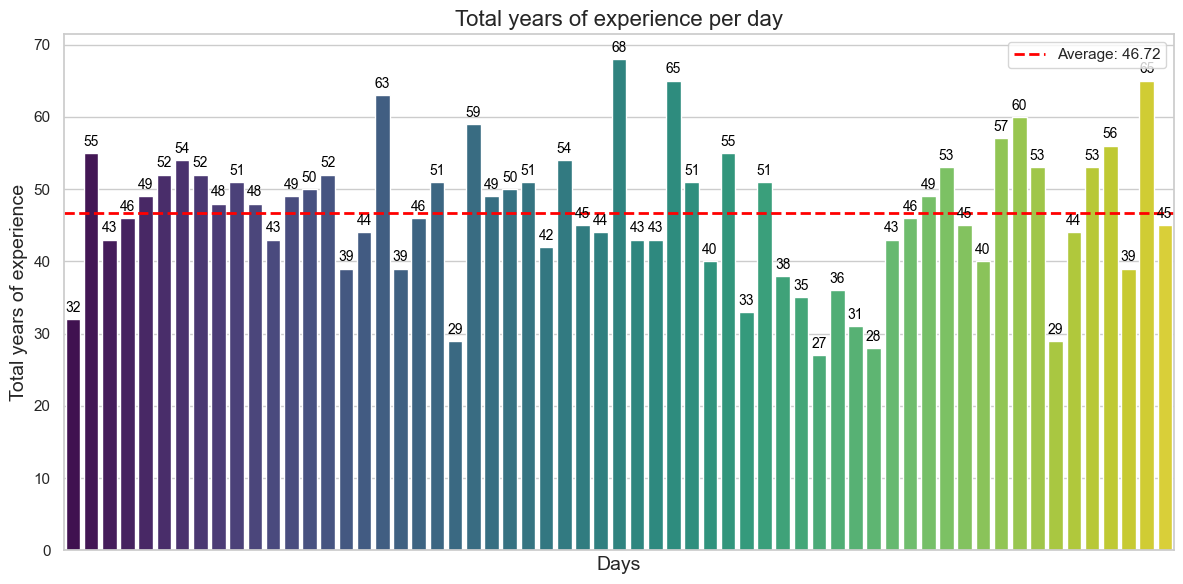

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Create a DataFrame
df = pd.DataFrame(final, columns=['Values'])

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=df.index, y='Values', data=df, palette='viridis')

# Calculate the average value
average_value = np.mean(final)

# Add a horizontal line for the average value
plt.axhline(average_value, color='red', linestyle='--', linewidth=2, label=f'Average: {average_value:.2f}')

# Customize the plot
bar_plot.set_xlabel('Days', fontsize=14)
bar_plot.set_ylabel('Total years of experience', fontsize=14)
bar_plot.set_title('Total years of experience per day', fontsize=16)
bar_plot.set_xticks([])  # Hide x-axis labels for better readability

# Add value labels on top of the bars
for index, value in enumerate(final):
    bar_plot.text(index, value + 1, str(value), color='black', ha="center", fontsize=10)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('../figures/total_years_of_experience_per_day.png')
plt.show()